# <center>Time Series Analysis on Pune precipitation data from 1965 to 2002.</center>

## <center>Algorithm: LSTM(Long Short Term Memory) </center>

### Import libraries

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Filename

In [13]:
filename = 'pune_1965_to_2002.csv'

### Data
- Downloaded from http://www.indiawaterportal.org/met_data/
- State: Maharashtra
- District: PUNE
- Data type: Precipitation
- Data Range: Monthly mean precipitation for all the years from 1972 to 2002

### Transpose data for easy visualiztion

In [14]:
rainfall_data_matrix = pd.read_csv(filename, delimiter='\t')
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix = rainfall_data_matrix.transpose()
rainfall_data_matrix

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.029,0.905,0.248,0.318,0.248,0.070,0.000,0.000,0.000,0.000,...,0.000,0.879,0.695,0.016,1.284,0.008,0.000,0.000,0.147,0.231
Feb,0.069,0.000,3.390,3.035,2.524,0.000,0.000,0.029,2.969,0.000,...,0.078,0.325,0.000,2.779,0.000,2.671,1.431,0.170,0.000,0.911
Mar,0.000,0.000,1.320,1.704,0.334,0.001,0.000,0.000,0.234,6.427,...,1.211,2.415,1.770,0.087,0.747,0.073,0.000,0.000,2.178,0.388
Apr,21.667,2.981,13.482,23.307,4.569,16.218,0.812,5.982,3.925,16.864,...,2.062,16.823,25.949,6.318,23.912,0.377,0.642,1.193,1.528,53.266
May,17.859,63.008,11.116,7.441,6.213,68.036,57.691,19.101,14.978,51.209,...,3.248,33.378,23.964,5.134,4.664,15.717,35.828,26.237,7.860,18.430
Jun,102.111,94.088,251.314,179.872,393.682,300.546,297.187,132.413,304.484,148.697,...,234.068,749.030,163.515,453.607,673.831,238.609,415.471,371.328,247.982,509.145
Jul,606.071,481.942,780.006,379.354,678.354,330.502,122.195,338.484,696.024,405.359,...,450.088,707.986,501.461,558.586,422.913,590.663,277.137,265.417,279.547,84.936
Aug,402.521,59.386,181.069,171.979,397.335,283.476,372.693,68.741,256.932,319.651,...,150.278,230.898,114.206,212.489,541.579,362.357,98.616,220.814,189.404,257.205
Sep,69.511,150.624,183.757,219.884,205.413,158.640,286.056,120.415,183.206,288.533,...,101.928,115.509,288.262,203.642,60.477,243.444,225.962,147.196,158.025,78.269
Oct,5.249,1.308,50.404,73.997,24.014,115.758,39.424,1.078,101.805,188.876,...,225.904,116.348,84.359,176.471,31.050,96.324,180.300,38.246,135.518,21.486


### Genearete dates from 1965-01(January 1965) to 2002-12(December 2002)

In [15]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

### Visualize the whole data

Text(0.5,1,'Month vs Precipitation across all years')

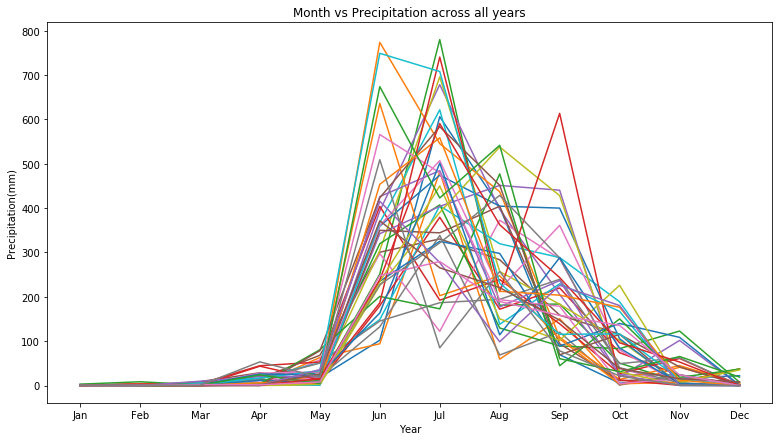

In [16]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

### Box plot

Text(0.5,1,'Month vs Precipitation across all years')

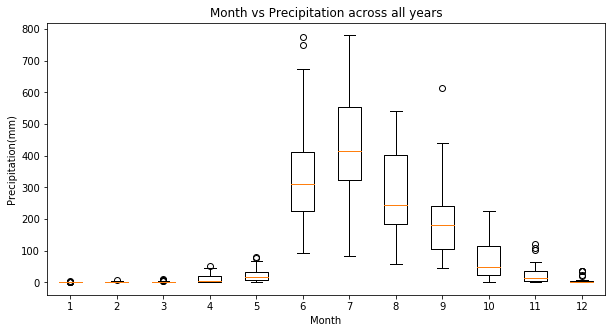

In [17]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

### Insights from the plot
- The rainfall in the months November, December, January, February, March and April is very less.
- The rainfall in the months June, July and August are high compared to rainfall in other months of the year. 
- We can observe the seasonality effect.

In [18]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

### Split the whole data into train(1965 - 1995) and test data(1995 - 2002)

In [19]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_rainfall_data = rainfall_data.ix['1995': '2002']
rainfall_data = rainfall_data.ix[: '1994']
rainfall_data.head()

,Precipitation
1965-01-01,0.029
1965-02-01,0.069
1965-03-01,0.000
1965-04-01,21.667
1965-05-01,17.859


### Visualize data

Text(0.5,1,'Precipitation in mm')

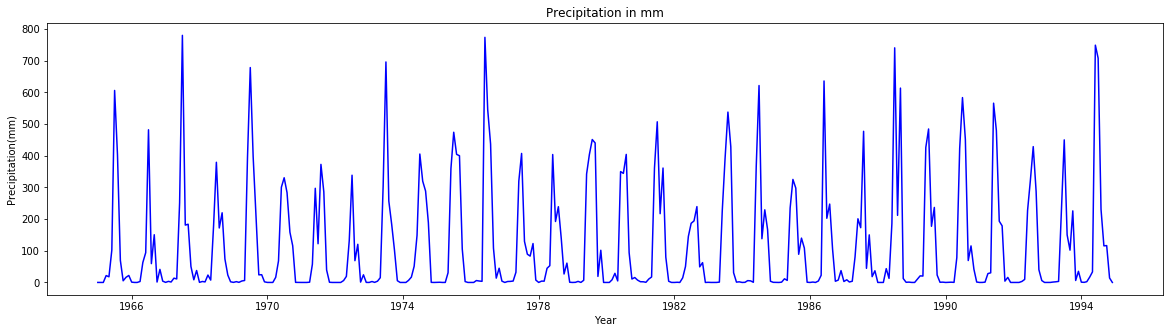

In [20]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

### Visualize data(zoomed version) - 5 years(1972 - 1977)

Text(0.5,1,'Precipitation in mm')

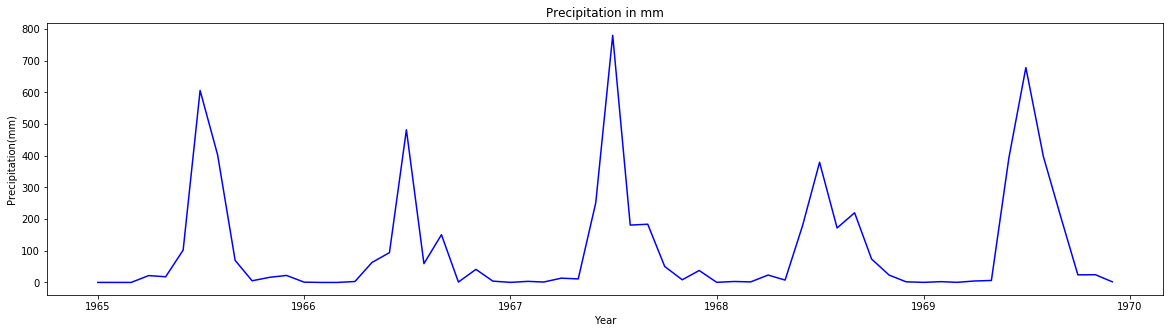

In [21]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data.ix[:60], color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

### ARIMA

In [53]:
data = rainfall_data
data = data.astype('float32')

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [73]:
data = scaler.fit_transform(rainfall_data)
test_data = scaler.fit_transform(test_rainfall_data)

In [74]:
data.shape

(360, 1)

In [75]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [77]:
look_back = 3
trainX, trainY = create_dataset(data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [78]:
trainX.shape

(356, 3)

In [79]:
trainY.shape

(356,)

In [81]:
testY

array([3.85096560e-02, 3.55638135e-02, 2.42664704e-01, 7.44194019e-01,
       1.69487601e-01, 4.27795694e-01, 1.25193112e-01, 7.22139528e-03,
       3.11650844e-05, 2.37448262e-05, 4.12417950e-03, 1.29112493e-04,
       9.37623826e-03, 7.61912111e-03, 6.73176212e-01, 8.28970469e-01,
       3.15344649e-01, 3.02215244e-01, 2.61892077e-01, 1.81083981e-02,
       0.00000000e+00, 1.90552230e-03, 0.00000000e+00, 1.10858657e-03,
       3.54866428e-02, 6.92161684e-03, 1.00000000e+00, 6.27624731e-01,
       8.03731203e-01, 8.97509910e-02, 4.60798034e-02, 9.70451048e-02,
       2.81836247e-02, 1.18724131e-05, 3.96390193e-03, 1.08335770e-04,
       5.59487468e-04, 2.33248396e-02, 3.54108078e-01, 8.76574393e-01,
       5.37756500e-01, 3.61283467e-01, 1.42949790e-01, 7.86027951e-02,
       5.19418074e-05, 0.00000000e+00, 2.12367790e-03, 0.00000000e+00,
       9.52761152e-04, 5.31706021e-02, 6.16580419e-01, 4.11285619e-01,
       1.46351236e-01, 3.35339276e-01, 2.67574511e-01, 3.90305581e-04,
      

In [83]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [85]:
trainX.shape

(356, 1, 3)

In [87]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0507
Epoch 2/100
 - 1s - loss: 0.0434
Epoch 3/100
 - 1s - loss: 0.0405
Epoch 4/100
 - 1s - loss: 0.0381
Epoch 5/100
 - 1s - loss: 0.0364
Epoch 6/100
 - 1s - loss: 0.0354
Epoch 7/100
 - 1s - loss: 0.0346
Epoch 8/100
 - 1s - loss: 0.0340
Epoch 9/100
 - 1s - loss: 0.0339
Epoch 10/100
 - 1s - loss: 0.0334
Epoch 11/100
 - 1s - loss: 0.0330
Epoch 12/100
 - 1s - loss: 0.0328
Epoch 13/100
 - 1s - loss: 0.0326
Epoch 14/100
 - 1s - loss: 0.0324
Epoch 15/100
 - 1s - loss: 0.0323
Epoch 16/100
 - 1s - loss: 0.0318
Epoch 17/100
 - 1s - loss: 0.0317
Epoch 18/100
 - 1s - loss: 0.0314
Epoch 19/100
 - 1s - loss: 0.0312
Epoch 20/100
 - 1s - loss: 0.0312
Epoch 21/100
 - 1s - loss: 0.0310
Epoch 22/100
 - 1s - loss: 0.0306
Epoch 23/100
 - 1s - loss: 0.0307
Epoch 24/100
 - 1s - loss: 0.0305
Epoch 25/100
 - 1s - loss: 0.0303
Epoch 26/100
 - 1s - loss: 0.0299
Epoch 27/100
 - 1s - loss: 0.0299
Epoch 28/100
 - 1s - loss: 0.0297
Epoch 29/100
 - 1s - loss: 0.0297
Epoch 30/100
 - 1s - lo

In [88]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [90]:
testPredict[:5]

array([[0.09938404],
       [0.17812772],
       [0.15877624],
       [0.4494575 ],
       [0.4189101 ]], dtype=float32)

In [91]:
testY[:5]

array([0.03850966, 0.03556381, 0.2426647 , 0.74419402, 0.1694876 ])

In [92]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [94]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 107.77 RMSE
Test Score: 131.11 RMSE


In [104]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
#|testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

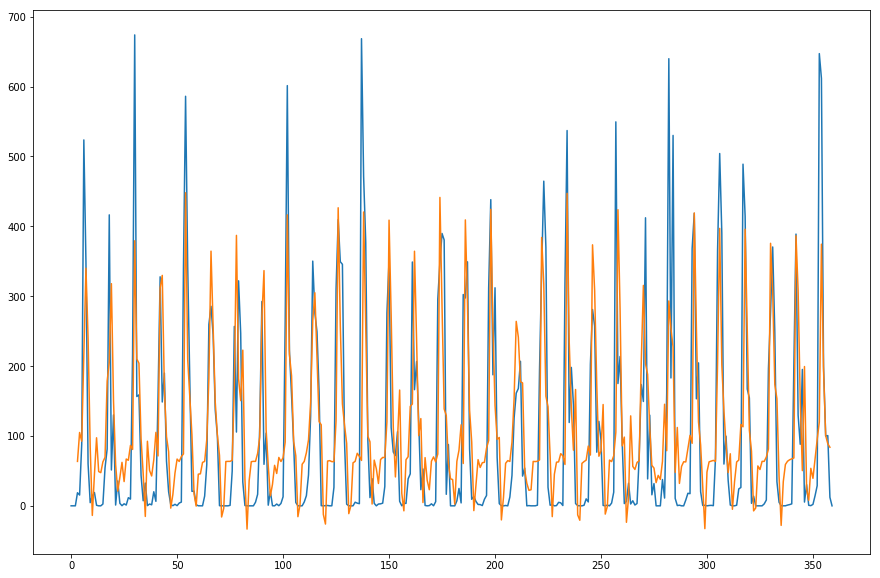

In [105]:
# plot baseline and predictions
plt.rcParams['figure.figsize'] = [15,10]
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()